## Project Goal:To Analyse the android apps users and market
### Team Members
    Abhijit Sundar Rajan
    Arpita Narangikar
    Mukesh Kumar
    Tharunya Ganeshan
    varsha vuruputur srinivasan
    Varun Shah
### Target Audience
    Android Developer
    Investors of Android market
    New/Old Android users 
### Description of Datasets:
#### This dataset contains all the details of the applications on Google Play Store. There are 13 features/variables and more than 10,000 records.Web scraped data of 10k Play Store apps for analysing the Android market

### Questions to address:
    1.What is the ratio of free to paid apps?
    2.What percentage of applications have over a Million and over a Billion downloads?
    3.Which application category is the most popular?
    4.Is there any correlation between Rating and Installs?

### Importing all the required libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
%matplotlib inline

### Data Exploration

In [31]:
df_raw = pd.read_csv('googleplaystore.csv')

In [32]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [33]:
df_raw.shape

(10841, 13)

In [34]:
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## Data Munging/Cleaning
### From the above records we discover that we have to clean and format the data to be understood by python and get the proper analyzed format.
### Data Cleaning and formatting is an important part of analyzing or/and machine learning process, as high quality data translates to high quality predictions and models.
    for example python can't understand like Installs value is "10000+", Size is 10M ,Naming containing  space etc.
#### we took the following steps to make our data available to answer the questions
    1.Formatting Column Name
    2.Removing Unneccessary Collumns
    3.Handled the missing value or Null value
    4.Convert all app sizes to MB
    5.Remove '+' from 'Number of Installs' to make it numeric

### 1.Formatting Columns

In [35]:
df_raw.columns = df_raw.columns.str.replace(' ','_')#replacing the spaces with underscore
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### 2. Dropping unnecessary columns

In [36]:
#Deleting the non analytical column like Genres,Android_Ver
df_raw = df_raw.drop(["Genres", "Android_Ver","Current_Ver","Last_Updated"], axis=1)

In [37]:
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone


### 3. Handling missing and null values

In [38]:
df_raw.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
dtype: int64

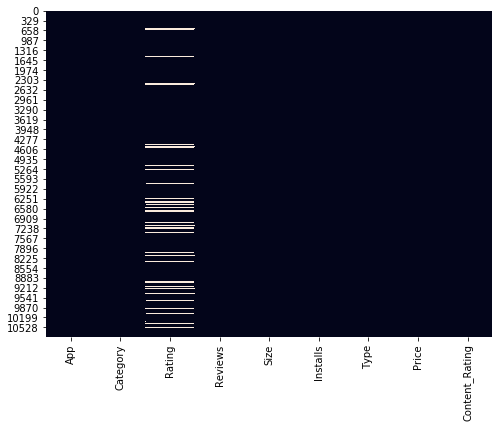

In [39]:
plt.figure(figsize=(8,6,))
sns.heatmap(df_raw.isnull(), cbar = False)

#### Analyzing the missing value it look like 1474 apps the Rating data is missing .So, either we can replace the mean or drop it. Dropping may cause to loose critical information.To keep the information We are replacing the missing rating with mean value

In [40]:
df_raw["Rating"].fillna(round(df_raw["Rating"].mean()) , inplace = True)

In [41]:
df_raw.isnull().sum()
print(df_raw[df_raw.isnull().any(axis=1)].head())

                                           App Category  Rating Reviews  \
9148                 Command & Conquer: Rivals   FAMILY     4.0       0   
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

                     Size Installs Type     Price Content_Rating  
9148   Varies with device        0  NaN         0   Everyone 10+  
10472              1,000+     Free    0  Everyone            NaN  


### The remaining 2 missing values are Type and Content_Rating which is difficult to fill and its impact will be almost negligible. We are dropping it and the data we are keeping in a new data frame

In [42]:
df_clean = df_raw.dropna().copy()

In [43]:
df_clean.describe()

,Rating
count,10839.000000
mean,4.165698
std,0.483416
min,1.000000
25%,4.000000
50%,4.200000
75%,4.500000
max,5.000000


In [44]:
df_clean.count()

App               10839
Category          10839
Rating            10839
Reviews           10839
Size              10839
Installs          10839
Type              10839
Price             10839
Content_Rating    10839
dtype: int64

### Analyzing and working with Size columns

In [47]:
df_clean.Size.value_counts()

Varies with device    1694
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
                      ... 
965k                     1
961k                     1
683k                     1
663k                     1
81k                      1
898k                     1
9

In [48]:

#To find and replace M as 1,000,000 and K as 1,000 to be read by python
df_clean['Size'] = df_clean['Size'].replace(r'[kM]+$','',regex=True).astype(float)*df_clean.Size.str.extract(r'[\d\.]+([kM]+)',expand=False).replace(['k','M'],[10**3,10**6]).astype(int).copy()
df_clean.head()

### Function to convert all the size value in exponential format to float type

In [54]:
def convert(n):
    try:
        float(n)
        return True
    except ValueError:
        return False
temp_arr = df_clean.Size.apply(lambda  x:convert(x))

In [55]:
df_clean.Size.value_counts()

10000000.0    1840
11000000.0     198
12000000.0     196
14000000.0     194
13000000.0     191
15000000.0     184
17000000.0     160
19000000.0     154
16000000.0     149
26000000.0     149
25000000.0     143
20000000.0     139
21000000.0     138
24000000.0     136
18000000.0     133
23000000.0     117
22000000.0     114
29000000.0     103
27000000.0      97
28000000.0      95
30000000.0      84
33000000.0      79
3300000.0       77
37000000.0      76
35000000.0      72
31000000.0      70
2900000.0       69
2300000.0       68
2500000.0       68
2800000.0       65
              ... 
412000.0         1
97000.0          1
716000.0         1
585000.0         1
454000.0         1
695000.0         1
613000.0         1
220000.0         1
93000.0          1
500000.0         1
67000.0          1
749000.0         1
924000.0         1
728000.0         1
309000.0         1
421000.0         1
629000.0         1
460000.0         1
280000.0         1
913000.0         1
190000.0         1
544000.0    

In [56]:
df_clean.Size = pd.to_numeric(df_clean.Size).copy()

### Analyzing and working with Installs column
### Removing + sign from Installs and converting it as numeric column

In [49]:
df_clean.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               14
Name: Installs, dtype: int64

In [51]:
#df_clean["Installs_numeric"] = df_clean.loc[:,("Installs")].replace('+', '')
#df_clean['Installs'] = df_clean['Installs'].str.replace('+','',inplace=True)
df_clean['Installs_numeric'] = df_clean['Installs'].str.replace('+', "")
df_clean['Installs_numeric'] = df_clean['Installs_numeric'].str.replace(',', "")

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 10 columns):
App                 10839 non-null object
Category            10839 non-null object
Rating              10839 non-null float64
Reviews             10839 non-null object
Size                10839 non-null float64
Installs            10839 non-null object
Type                10839 non-null object
Price               10839 non-null object
Content_Rating      10839 non-null object
Installs_numeric    10839 non-null object
dtypes: float64(2), object(8)
memory usage: 931.5+ KB


In [52]:
def convert(n):
    try:
        float(n)
        return True
    except ValueError:
        return False
temp_arr = df_clean.Installs_numeric.apply(lambda  x:convert(x))

In [53]:
df_clean.Installs_numeric = pd.to_numeric(df_clean.Installs_numeric)

### Analyze and format "Review" column

In [54]:
df_clean["Reviews"] = (df_clean["Reviews"]).astype("float")

### Storing the final and formatted data in a new file and read and analyze from that file

In [55]:
df_clean.to_csv("Cleaned_playstore.csv")

In [2]:
df_final = pd.read_csv('Cleaned_playstore.csv')

### Exploratory Analysis

### Analyzing the Type of Application 

In [3]:
df_final['Type'].unique()

array(['Free', 'Paid'], dtype=object)

#### Answer of the first question:
    What is the ratio of free to paid apps?

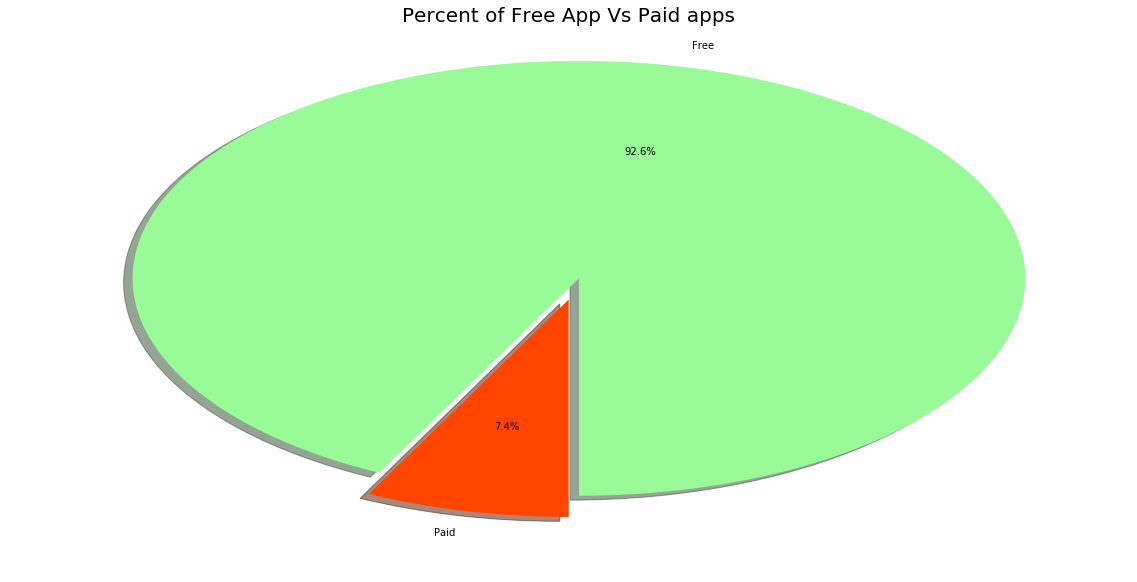

In [4]:
# Data to plot
labels =df_final['Type'].value_counts(sort = True).index
sizes = df_final['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
#rcParams['figure.figsize'] = (8,8)
# Plot
plt.figure(figsize=(20,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App Vs Paid apps',size = 20)
plt.show()

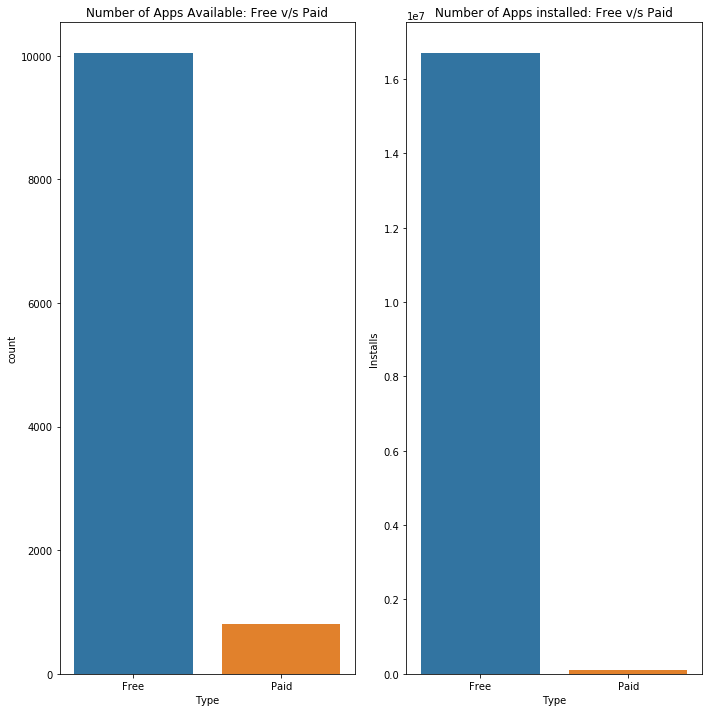

In [5]:
#Number of free and paid Apps available
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.countplot(x='Type',data=df_final)
plt.title("Number of Apps Available: Free v/s Paid")

#Most installed apps based on Category
plt.subplot(1,2,2)
sns.barplot(x='Type',y='Installs',data=df_final,ci=None)
plt.title("Number of Apps installed: Free v/s Paid")
plt.tight_layout()

### Finding : 12:1
### 92.6% are free and 7.4% of apps in the store are paid apps

### Answering the second question
    How percentage of applications has more than 1,000,000 downloads?
    From the below graph we can visualize 14.7% has more than 1,000,000 downloads.

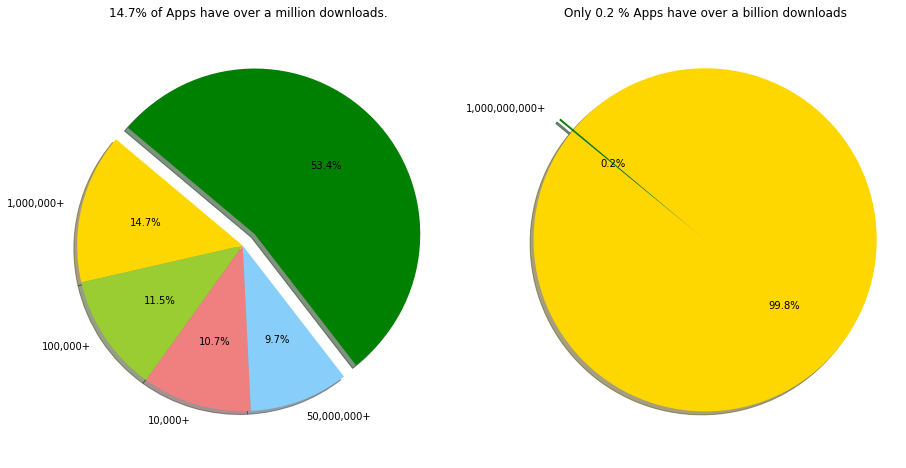

In [6]:
#print(Counter(df["Installs"]).most_common())
labels = ['1,000,000+', '100,000+', '10,000+', '50,000,000+' , '']
sizes = [1418, 1113, 1032, 936 , 5159]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'green']
explode = (0, 0, 0, 0 , 0.1)  

labels2 = ['1,000,000,000+', '']
sizes2 = [20 ,10839]
colors2 = ['green' , 'gold']
explode2 = (0 , 0.1)  

plt.figure(1 , figsize = (15 , 8))
plt.subplot(121)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("14.7% of Apps have over a million downloads.")

plt.subplot(122)
plt.pie(sizes2, explode=explode2, labels=labels2, colors=colors2,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Only 0.2 % Apps have over a billion downloads")

plt.show()

### Answering third question
    Which application category is the most popular?
    Below are the graphs with the explanation

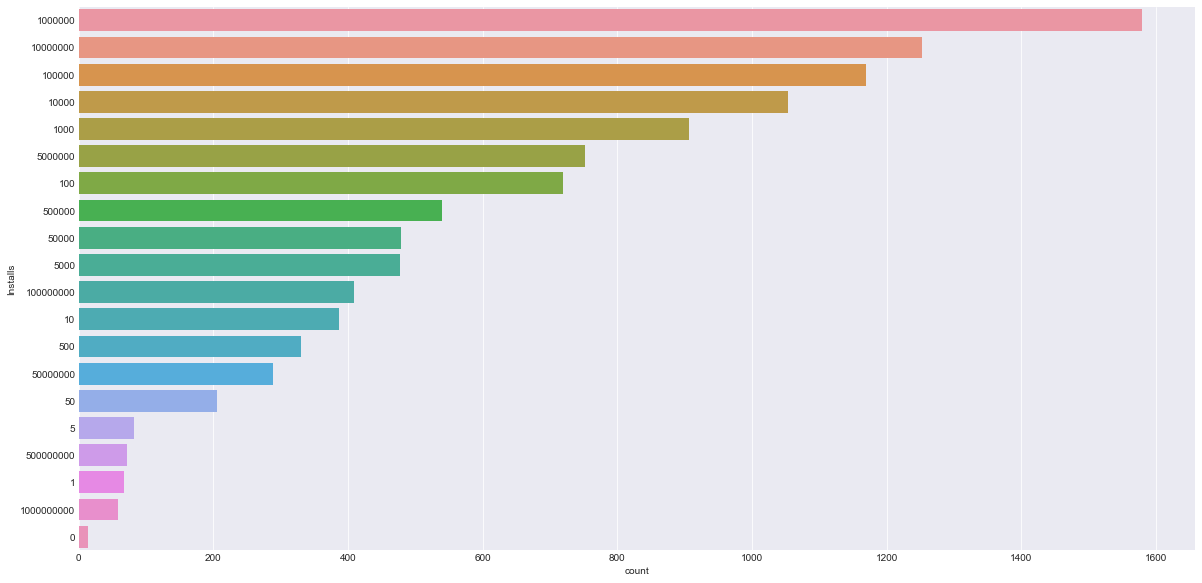

In [121]:
#sns.countplot(orientation="horizontal",data=df_clean ,col_name="Installs",rotaion=360,title="Downloads",figsize=(15,8))
plt.figure(figsize=(20,10))
ax = sns.countplot(y="Installs", data=df_final,order = df_final['Installs'].value_counts().index)

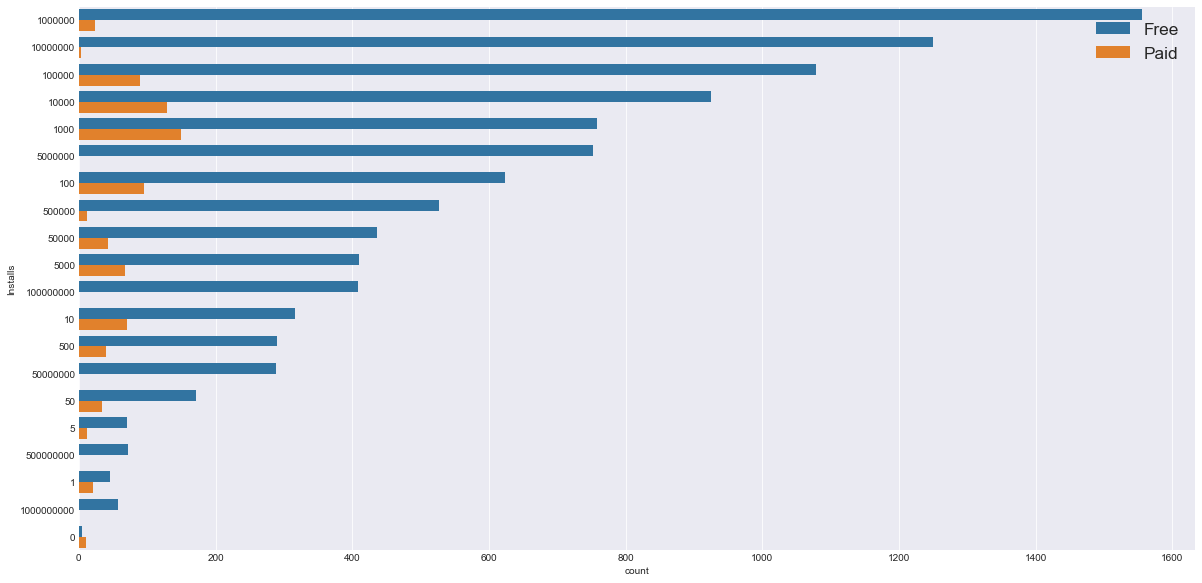

In [122]:
plt.figure(figsize=(20,10))

ax = sns.countplot(y="Installs", data=df_final,hue="Type",order = df_final['Installs'].value_counts().index)
plt.legend(fontsize='xx-large')

In [124]:
df_clean['Rating'].describe()

count    10839.000000
mean         4.165698
std          0.483416
min          1.000000
25%          4.000000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

## Number of Apps available based on Catgeory 

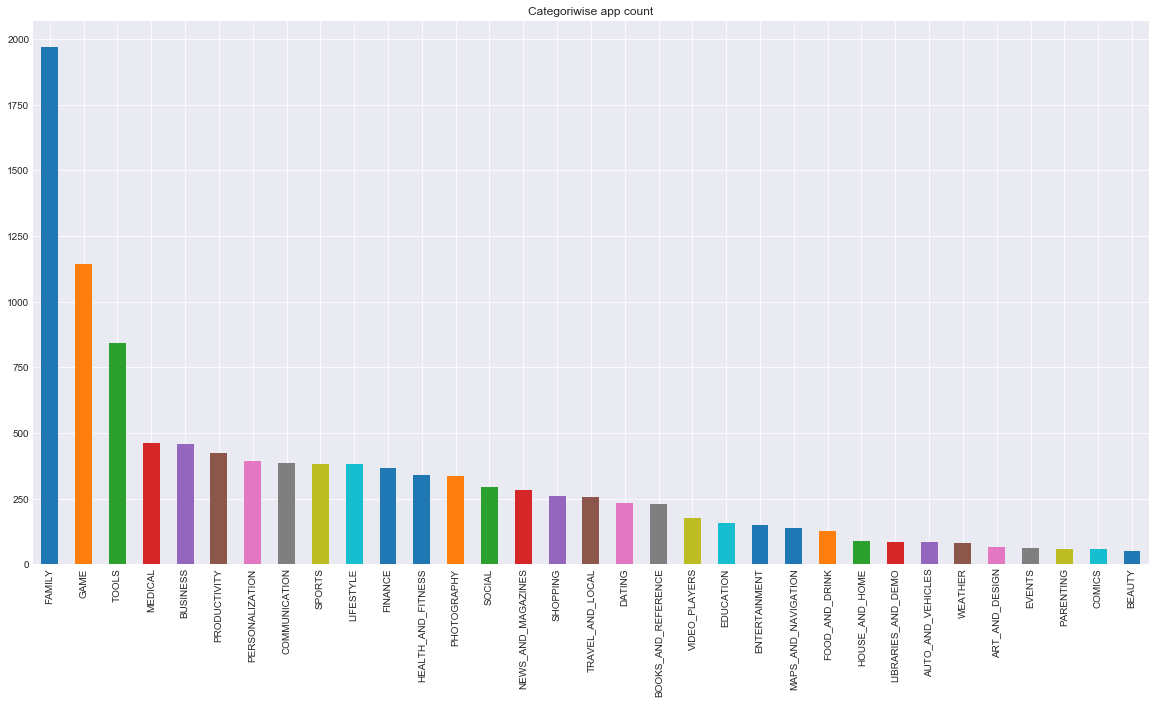

In [125]:
plt.figure(figsize=(20,10))
df_final.Category.value_counts().plot(kind='bar',title="Categoriwise app count")
plt.show()
sns.set_style('darkgrid')

## Number of Apps installed based on Category

Text(0.5,1,'Number of Apps installed based on Category')

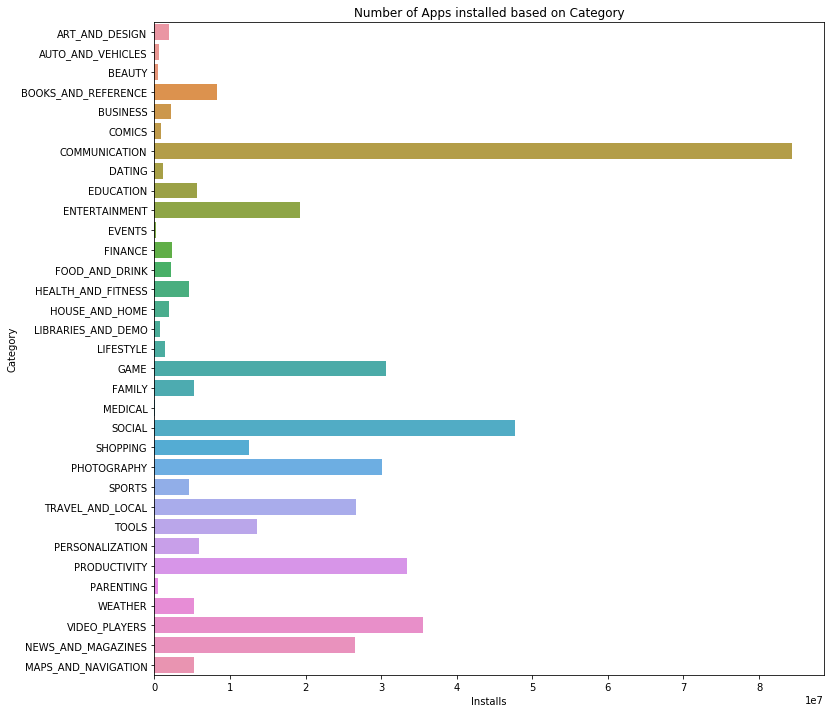

In [5]:
#Most installed apps based on Category
plt.figure(figsize=(12,12))
sns.barplot(x='Installs',y='Category',data=df_final,ci=None)
plt.title("Number of Apps installed based on Category")

# plotting categories by passing the unique category values in a list.

In [126]:
final_cols=df_final['Category'].unique()
#final_col=list(df_final.columns)
print(final_cols)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


### Finding
Game and Family are the most represented genre in Play store and Beauty is the least represented genre.

Text(0.5,1,'Boxplot of Rating VS Category')

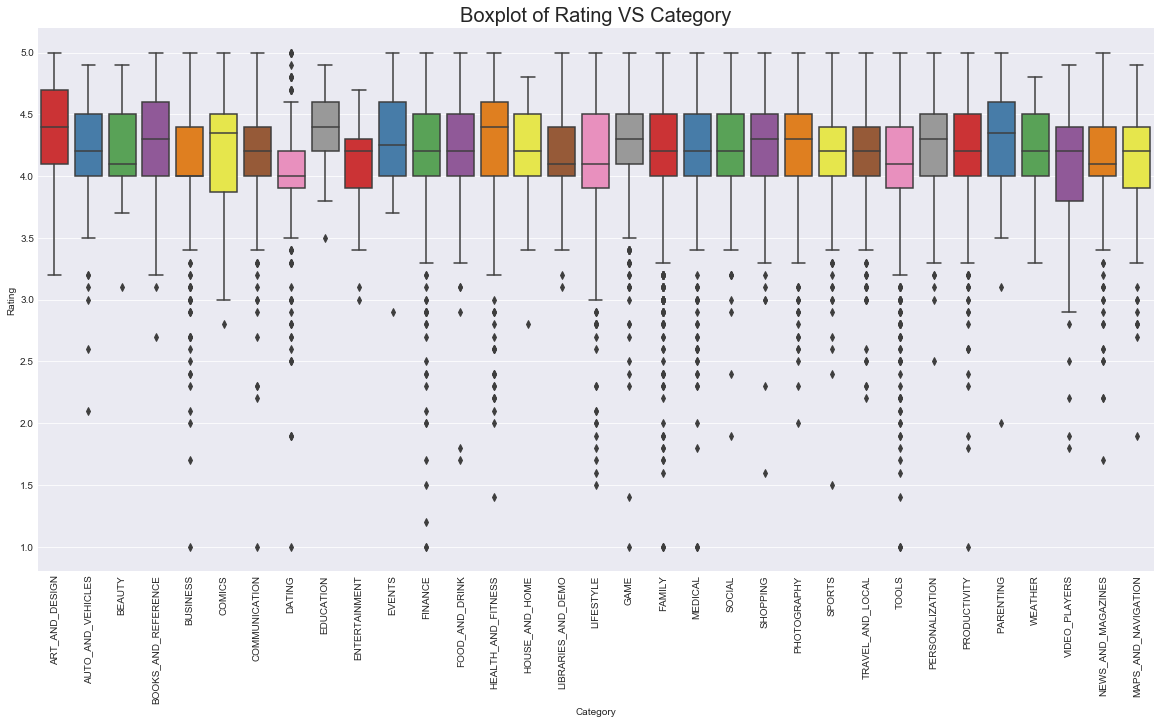

In [127]:
#g = sns.catplot(x="Category",y="Rating",data=df_final, kind="box", height = 10 ,palette = "Set1")
plt.figure(figsize=(20,10))
g = sns.boxplot(x="Category",y="Rating",data=df_final, palette = "Set1")
#g = sns.scatterplot(x="Category", y="Rating", hue="kind", data=df_final)
#g.despine(left=True)
g.set_xticklabels(labels=final_cols,rotation=90)
#g.set( xticks=range(0,34))
#g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

### Finding
There is hardly any difference in the rating of applications in each category.

Text(0.5,1,'Rating VS Installs')

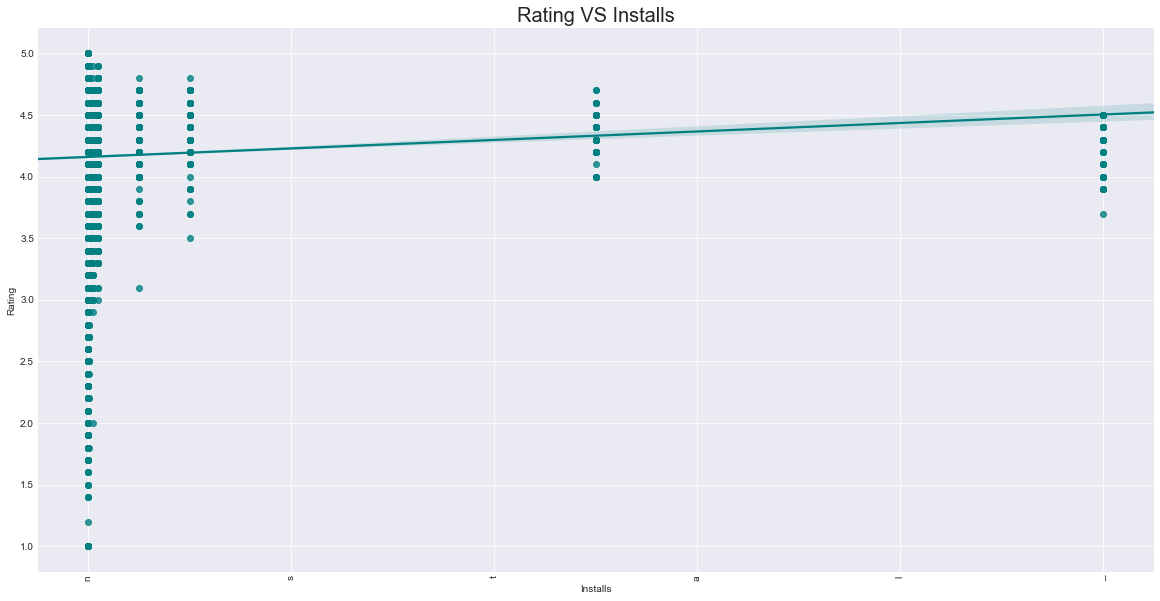

In [145]:
plt.figure(figsize = (20,10))
h=sns.regplot(x="Installs", y="Rating", color = 'teal',data=df_final);
h.set_xticklabels(labels="Instal_num",rotation=90)
plt.title('Rating VS Installs',size = 20)
#plt.xticks(np.arange(20),('0','1','5','10','50','100','500','1000','5000','10000','50000','100000','500000','1000000','5000000','10000000','50000000','100000000',
#'500000000','1000000000'))

### From the above graph we can infere that Installation is slightly positively correlated  to the rating

## Categorical Data Encoding

### Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. We need to make all data ready for the model, so we will convert categorical variables (variables that stored as text values) into numircal variables.


In [9]:
# App values encoding
df_ds=pd.read_csv('Cleaned_playstore.csv')

le = preprocessing.LabelEncoder()
df_ds['App'] = le.fit_transform(df_ds['App'])
# This encoder converts the values into numeric values

# Category features encoding
category_list = df_ds['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
df_ds = pd.concat([df_ds, pd.get_dummies(df_ds['Category'], prefix='cat')], axis=1)

# Type encoding
df_ds['Type'] = pd.get_dummies(df_ds['Type'])

df_ds['Content_Rating'] = le.fit_transform(df_ds['Content_Rating'])
df_ds["Reviews"] = le.fit_transform(df_ds['Reviews'])
df_ds["Size"] = le.fit_transform(df_ds['Size'])

## Evaluation Procedure

### In this section shows how k-nearest neighbors and random forests can be used to predict app ratings based on the other matrices. First, the dataset has to separate into dependent and independent variables (or features and labels). Then those variables have to split into a training and test set.

During training stage we give the model both the features and the labels so it can learn to classify points based on the features.


## Testing and Training dataset :
### 75% as Training and 25% as Test dataset

In [10]:
# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs_numeric', 'Type', 'Price', 'Content_Rating']
features.extend(category_list)
X = df_ds[features]
y = df_ds['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)



## K-Nearest Neighbors Model

### The k-nearest neighbors algorithm is based around the simple idea of predicting unknown values by matching them with the most similar known values. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset — its "nearest neighbors".


In [6]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [7]:
df_ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Installs_numeric,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6961,ART_AND_DESIGN,4.1,159,53,10000,1,0,1,10000,...,0,0,0,0,0,0,0,0,0,0
1,2632,ART_AND_DESIGN,3.9,725,27,500000,1,0,1,500000,...,0,0,0,0,0,0,0,0,0,0
2,8655,ART_AND_DESIGN,4.7,3948,366,5000000,1,0,1,5000000,...,0,0,0,0,0,0,0,0,0,0
3,7826,ART_AND_DESIGN,4.5,4564,99,50000000,1,0,4,50000000,...,0,0,0,0,0,0,0,0,0,0
4,7021,ART_AND_DESIGN,4.3,725,62,100000,1,0,1,100000,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Find the mean accuracy of knn regression using X_test and y_test
model.fit(X_test, y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')

### Calculate the mean accuracy of the KNN model

In [9]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 17.22%'

### Trying different numbers of n_estimators 

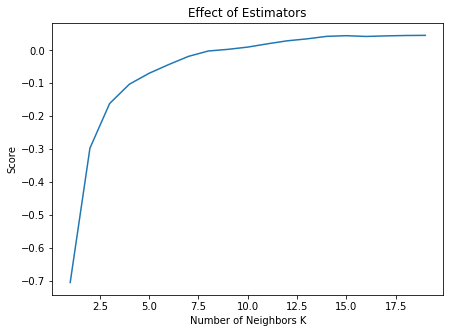

In [10]:
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

### Random Forest Model

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest.


[(10, 0.06154419357400176),
 (20, 0.09642016475942461),
 (30, 0.1191888954158763),
 (40, 0.12394690473727232),
 (50, 0.12986667042148337),
 (60, 0.13029101947356703),
 (70, 0.13886773318676449),
 (80, 0.13732221574549908),
 (90, 0.13668684435269607),
 (100, 0.14423017738808208),
 (110, 0.14469944764855025),
 (120, 0.1419825025993119),
 (130, 0.1406888031929241),
 (140, 0.13756596319680525),
 (150, 0.14263808523746446),
 (160, 0.1385700316057209),
 (170, 0.14183397385316643),
 (180, 0.14639069480874123),
 (190, 0.14450724124494485)]

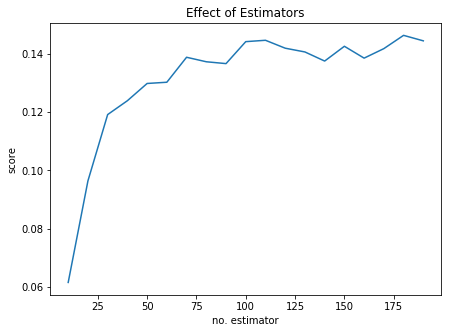

In [12]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [13]:
# Calculate the mean accuracy of the Random forest model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 14.45%'

In [12]:
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.28227519906778015)

In [13]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 0.19589551011438094)

## Decision Tree

In [16]:
# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs_numeric', 'Rating', 'Price', 'Type']
features.extend(category_list)
X = df_ds[features]
y = df_ds['Content_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [19]:
 # Creating the classifier object 
model_gini = DecisionTreeClassifier(criterion = "gini",  random_state = 100,max_depth=3, min_samples_leaf=5) 
  
# Performing training 
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [22]:
#Decision tree with entropy 
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
# Performing training 
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

## Decision Matrix and Accuracy

In [33]:
gini_pred = model_gini.predict(X_test) 
print("Predicted values:", gini_pred) 

print("Confusion Matrix: ", confusion_matrix(y_test, gini_pred)) 
print ("Accuracy : ", accuracy_score(y_test,gini_pred)*100) 
      
print("Report : ", classification_report(y_test, gini_pred)) 

Predicted values: [1 1 1 ... 1 1 1]
Confusion Matrix:  [[2129    0    7   27]
 [  98    0    0    2]
 [  80    0   40   20]
 [ 271    0    3   33]]
Accuracy :  81.25461254612546
Report :               precision    recall  f1-score   support

          1       0.83      0.98      0.90      2163
          2       0.00      0.00      0.00       100
          3       0.80      0.29      0.42       140
          4       0.40      0.11      0.17       307

avg / total       0.75      0.81      0.76      2710



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### CONCLUSION

    The accuracy of KNN and Random forest is very low,so this dataset is not fit for predicting the rating as most of the data were categorical.So,Decision treee is a better choice which is 81% accurate.
    
    Average rating of (active) apps on Google Play Store is 4.17.

    Users prefer to pay for apps that are light-weighted. Thus, a paid app that is bulky may not perform well in the market.

    Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

    Most of the top rated apps are optimally priced between ~1$ to ~30$ - neither too cheap nor too expensive.

    Medical and Family apps are the most expensive and even extend upto 80$.

    Users tend to download a given app more if it has been reviewed by a large number of people.

    Health and Fitness apps receive more than 85% positive reviews. Game and Social apps receive mixed feedback - 50% positive and 50% negative.

    Users are more grim and harsh while reviewing free apps than paid apps.



# Reference
1. Kaggle.com
2. https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f
3. https://www.youtube.com/watch?v=oflixU6iNDc